In [89]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt 

%matplotlib inline

In [90]:
data = pd.read_csv('/home/shalini/Downloads/Advertising.csv',index_col=0)
data.shape

(200, 4)

In [91]:
data.coloums=["TV","Radio","Newspaper","Sales"]
data.head()

/home/shalini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


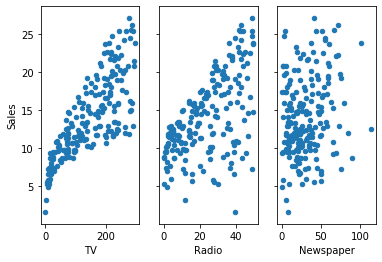

In [92]:
fig,axs=plt.subplots(1,3,sharey=True)

data.plot(kind="scatter",x="TV",y="Sales",ax=axs[0])
data.plot(kind="scatter",x="Radio",y="Sales",ax=axs[1])
data.plot(kind="scatter",x="Newspaper",y="Sales",ax=axs[2])

In [93]:
feature_col=["TV"]
x=data[feature_col]
y=data.Sales
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
print(f"fit {lm.fit(x,y)}")
print(f"interception ---------> {lm.intercept_}")  # y=mx+c "c"
print(f"coefficennt ----------> {lm.coef_}")  # y=mx+c "m"

fit LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
interception ---------> 7.032593549127694
coefficennt ----------> [0.04753664]


In [94]:
y=0.04753664*50+7.03259354912769
y

9.40942554912769

In [95]:
x_new=pd.DataFrame({'TV':[50]})
print(f" X_new--------------{x_new}")
print(f"predict value for 50 dollers {lm.predict(x_new)}")


 X_new--------------   TV
0  50
predict value for 50 dollers [9.40942557]


In [96]:
x_new=pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [97]:
predict=lm.predict(x_new)

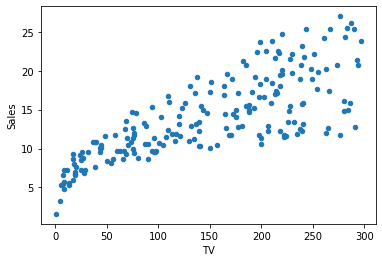

In [98]:
data.plot(kind="scatter",x="TV",y="Sales")


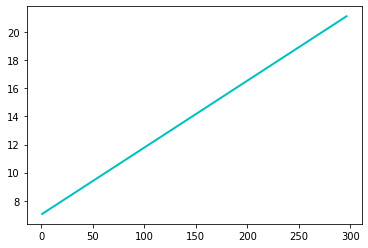

In [99]:
plt.plot(x_new,predict,c='c',linewidth=2)

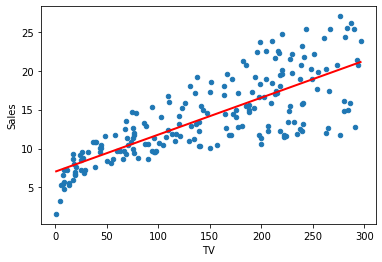

In [100]:
data.plot(kind="scatter",x="TV",y="Sales") # relation ship bw tv and sales
plt.plot(x_new,predict,c='r',linewidth=2) # hypothis line for min and max value

In [101]:
import statsmodels.formula.api as smf
lm=smf.ols(formula="Sales~TV",data=data).fit()
lm

In [102]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [103]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [104]:
lm.rsquared


0.611875050850071

In [105]:
lm.rsquared_adj

0.6099148238341623

In [106]:
feature_cols=['TV','Radio','Newspaper']
X=data[feature_cols]
y=data.Sales
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=0.3,random_state=42)
lm=LinearRegression()


In [107]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
lm.intercept_

2.9388893694594085

In [109]:
lm.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [110]:
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
lm.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [112]:
lm.intercept_

2.7089490925159048

In [113]:
prection=lm.predict(xtest)
print(sqrt(mean_squared_error(ytest,prection)))

1.948537204344638


In [114]:
lm=smf.ols(formula="Sales~TV+Radio+Newspaper",data=data).fit()
lm.conf_int
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           1.58e-96
Time:                        20:50:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
import numpy as np
np.random.seed(123456)
nums=np.random.rand(len(data))
mask_large=nums>0.5
len(mask_large)


200

In [116]:
data["Size"] ="small"
data.loc[mask_large,'Size']="large"
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,small
2,44.5,39.3,45.1,10.4,large
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,large
5,180.8,10.8,58.4,12.9,small


In [117]:
data['IsLarge']=data.Size.map({'small':0,'large':1})

In [118]:
data['IsLarge']

1      0
2      1
3      0
4      1
5      0
      ..
196    1
197    1
198    1
199    0
200    0
Name: IsLarge, Length: 200, dtype: int64

In [119]:
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,small,0
2,44.5,39.3,45.1,10.4,large,1
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,large,1
5,180.8,10.8,58.4,12.9,small,0


In [120]:
feature_cols=['TV','Radio','Newspaper','Islarge']
x=data[feature_col]
y=data['Sales']

In [121]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
np.random.seed(123456)
nums=np.random.rand(len(data))
mask_suburban=(nums>0.33)&(nums<0.66)
mask_urban=nums>0.66

In [123]:
data['Area']="rural"
data.loc[mask_suburban,"Area"]="suburban" 
data.loc[mask_urban,"Area"]="urban"

In [124]:
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,small,0,rural
2,44.5,39.3,45.1,10.4,large,1,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,large,1,urban
5,180.8,10.8,58.4,12.9,small,0,suburban


In [125]:
area_dummies=pd.get_dummies(data.Area,prefix='Area').iloc[:,1:]
data=pd.concat([data,area_dummies],axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,small,0,rural,0,0
2,44.5,39.3,45.1,10.4,large,1,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,large,1,urban,0,1
5,180.8,10.8,58.4,12.9,small,0,suburban,1,0


In [126]:
feature_cols=['TV','Radio','Newspaper','IsLarge','Area_suburban','Area_urban']
y=data.Sales
x=data[feature_cols]
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
print(feature_cols,lm.coef_)

['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 0.04590898  0.18841854 -0.00064186  0.41385782 -0.31722477 -0.16080647]
